# import

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import chromedriver_autoinstaller
from selenium import webdriver 
# 웹 자동화 및 데이터 수집 작업을 위한 도구로 사용. 
# 웹 페이지를 자동으로 제어하고 데이터를 추출하거나 
# 웹 애플리케이션을 자동으로 테스트하고 결과를 분석하는 등의
# 작업에 유용하게 활용
from bs4 import BeautifulSoup  
# 웹 스크래핑 및 HTML/XML 데이터 파싱에 사용되는 도구로,
# 웹 페이지의 데이터를 추출하거나 분석하는 데 유용하게 활용
from selenium.webdriver.common.keys import Keys
import time 
# https://music.bugs.co.kr/chart 

C:\Users\OWNER\AppData\Local\Temp\ipykernel_16236\675979751.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [35]:
excel_names = ['../data/melon.xlsx', '../data/bugs.xlsx', '../data/genie.xlsx']

In [ ]:
# pd.concat([append_data, pd_data])

In [65]:
append_data = pd.DataFrame()
for name in excel_names:
    pd_data = pd.read_excel(name)
    append_data = pd.concat([append_data, pd_data], ignore_index=True)

append_data.head()

,서비스,순위,타이틀,가수
0,Melon,1위,Love wins all,아이유
1,Melon,2위,첫 만남은 계획대로 되지 않아,TWS (투어스)
2,Melon,3위,밤양갱,비비 (BIBI)
3,Melon,4위,To. X,태연 (TAEYEON)
4,Melon,5위,비의 랩소디,임재현


In [66]:
append_data.to_excel('../data/total.xlsx', index= False)

## 엑셀 파일 읽어오기 total.xlsx

In [67]:
temp_df = pd.read_excel('../data/total.xlsx').head(300)
temp_df

,서비스,순위,타이틀,가수
0,Melon,1위,Love wins all,아이유
1,Melon,2위,첫 만남은 계획대로 되지 않아,TWS (투어스)
2,Melon,3위,밤양갱,비비 (BIBI)
3,Melon,4위,To. X,태연 (TAEYEON)
4,Melon,5위,비의 랩소디,임재현
...,...,...,...,...
295,Genie,96위,널 미워하기로 했어,이예준
296,Genie,97위,Yes or No (Feat. 허윤진 of LE SSERAFIM & Crush),그루비룸 (GroovyRoom)
297,Genie,98위,Off The Record,IVE (아이브)
298,Genie,99위,Dynamite,방탄소년단


In [69]:
a = temp_df['순위'].str.replace('위','').astype(int)
a

0        1
1        2
2        3
3        4
4        5
      ... 
295     96
296     97
297     98
298     99
299    100
Name: 순위, Length: 300, dtype: int32

In [70]:
temp_df['순위'] = temp_df['순위'].str.replace('위','').astype(int)
temp_df.head()

,서비스,순위,타이틀,가수
0,Melon,1,Love wins all,아이유
1,Melon,2,첫 만남은 계획대로 되지 않아,TWS (투어스)
2,Melon,3,밤양갱,비비 (BIBI)
3,Melon,4,To. X,태연 (TAEYEON)
4,Melon,5,비의 랩소디,임재현


In [18]:
# 순위가 1, 2인 놈들만 좀 보자
temp_df[temp_df['순위'].isin([1,2])]

,서비스,순위,타이틀,가수
0,Melon,1,Love wins all,아이유
1,Melon,2,첫 만남은 계획대로 되지 않아,TWS (투어스)
100,Bugs,1,밤양갱,비비(BIBI)
101,Bugs,2,첫 만남은 계획대로 되지 않아,TWS (투어스)
200,Genie,1,첫 만남은 계획대로 되지 않아,TWS (투어스)
201,Genie,2,Love wins all,아이유 (IU)


In [19]:
a = temp_df.sort_values(by='순위', ascending=True)
a.head()

,서비스,순위,타이틀,가수
0,Melon,1,Love wins all,아이유
200,Genie,1,첫 만남은 계획대로 되지 않아,TWS (투어스)
100,Bugs,1,밤양갱,비비(BIBI)
1,Melon,2,첫 만남은 계획대로 되지 않아,TWS (투어스)
201,Genie,2,Love wins all,아이유 (IU)


In [21]:
# 가수별 곡의 수
temp_df['가수'].value_counts()

가수
임영웅                   27
IVE (아이브)             21
NewJeans              20
LE SSERAFIM (르세라핌)    16
(여자)아이들               13
                      ..
폴킴(Paul Kim)           1
The Kid LAROI          1
소수빈                    1
부석순(SEVENTEEN)         1
이예준                    1
Name: count, Length: 97, dtype: int64

In [22]:
# 순위가 1위인 가술 출력
temp_df[temp_df['순위'] == 1][['서비스', '가수']]

,서비스,가수
0,Melon,아이유
100,Bugs,비비(BIBI)
200,Genie,TWS (투어스)


#### groupby 사용

In [31]:
# 가수별 평균 순위 탑 10
a = temp_df.groupby('가수')['순위'].agg(['min', 'max', 'mean']) # reset_index는 데이터시트 형식
a.sort_values(by ='mean').head(10) # by는 정렬할 기준을 지정 연산 결과가 여러개일 때 by가 없으면 오류

,min,max,mean
가수,,,
아이유,1,1,1.000000
비비(BIBI),1,1,1.000000
TWS (투어스),1,2,1.666667
아이유 (IU),2,2,2.000000
비비 (BIBI),3,3,3.000000
아이유(IU),4,4,4.000000
임재현,4,13,7.333333
너드커넥션 (Nerd Connection),9,13,11.000000
박재정,7,24,14.000000


In [39]:
temp_df[:50]

,서비스,순위,타이틀,가수
0,Melon,1,Love wins all,아이유
1,Melon,2,첫 만남은 계획대로 되지 않아,TWS (투어스)
2,Melon,3,밤양갱,비비 (BIBI)
3,Melon,4,To. X,태연 (TAEYEON)
4,Melon,5,비의 랩소디,임재현
5,Melon,6,Love 119,RIIZE
6,Melon,7,에피소드,이무진
7,Melon,8,Perfect Night,LE SSERAFIM (르세라핌)
8,Melon,9,그대만 있다면 (여름날 우리 X 너드커넥션 (Nerd Connection)),너드커넥션 (Nerd Connection)
9,Melon,10,Drama,aespa


#### 특정 데이터 변경

##### Sol 1

In [42]:
# 순위 51위부터는 50위 이상으로 순위의 값을 변경해보자

temp_df_ = temp_df
temp_df_ = temp_df_[temp_df_['순위'] > 50]
temp_df_['순위'] = '50위 이상'
temp_df_

C:\Users\OWNER\AppData\Local\Temp\ipykernel_16236\4263914368.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_['순위'] = '50위 이상'


,서비스,순위,타이틀,가수
50,Melon,50위 이상,사건의 지평선,윤하 (YOUNHA)
51,Melon,50위 이상,Spicy,aespa
52,Melon,50위 이상,사랑하지 않아서 그랬어,임한별
53,Melon,50위 이상,첫 눈,EXO
54,Melon,50위 이상,심(心),DK(디셈버)
...,...,...,...,...
295,Genie,50위 이상,널 미워하기로 했어,이예준
296,Genie,50위 이상,Yes or No (Feat. 허윤진 of LE SSERAFIM & Crush),그루비룸 (GroovyRoom)
297,Genie,50위 이상,Off The Record,IVE (아이브)
298,Genie,50위 이상,Dynamite,방탄소년단


##### Sol 2 ( loc 사용)

In [43]:
temp_df_ = temp_df
temp_df_.loc[temp_df_['순위'] > 50, '순위'] = '50위 이상'
temp_df_

C:\Users\OWNER\AppData\Local\Temp\ipykernel_16236\1674402168.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50위 이상' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  temp_df_.loc[temp_df_['순위'] > 50, '순위'] = '50위 이상'


,서비스,순위,타이틀,가수
0,Melon,1,Love wins all,아이유
1,Melon,2,첫 만남은 계획대로 되지 않아,TWS (투어스)
2,Melon,3,밤양갱,비비 (BIBI)
3,Melon,4,To. X,태연 (TAEYEON)
4,Melon,5,비의 랩소디,임재현
...,...,...,...,...
295,Genie,50위 이상,널 미워하기로 했어,이예준
296,Genie,50위 이상,Yes or No (Feat. 허윤진 of LE SSERAFIM & Crush),그루비룸 (GroovyRoom)
297,Genie,50위 이상,Off The Record,IVE (아이브)
298,Genie,50위 이상,Dynamite,방탄소년단


### plot으로 나타내기

C:\Users\OWNER\AppData\Local\Temp\ipykernel_16236\1060156769.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x='가수', y='곡 수', data=songs_by_artist, palette='Set1' )


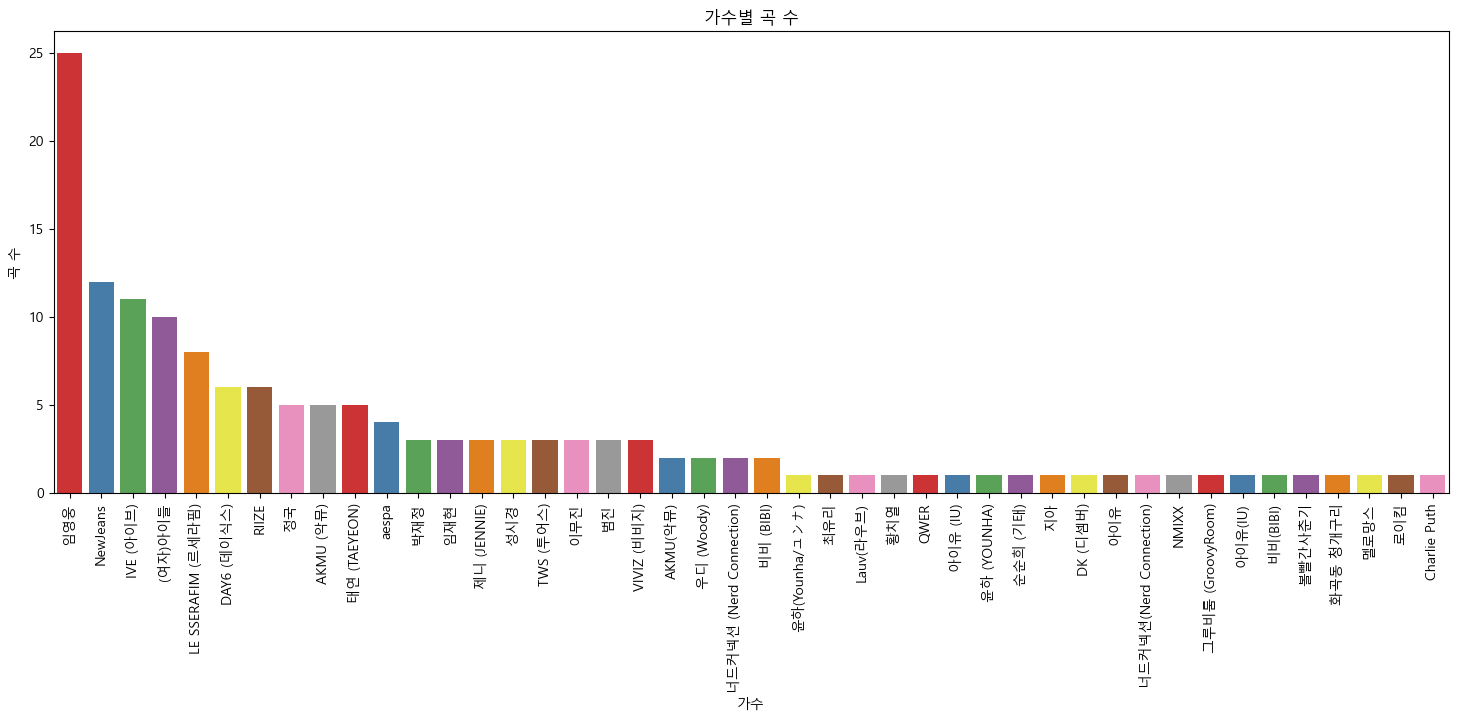

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

songs_by_artist = temp_df['가수'].value_counts().reset_index()
songs_by_artist.columns = ['가수', '곡 수'] # 컬럼명 변경
songs_by_artist = songs_by_artist[1:]

plt.figure(figsize=(18, 6)) # 도화지 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 폰트 변경
sns.barplot( x='가수', y='곡 수', data=songs_by_artist, palette='Set1' )
plt.title('가수별 곡 수')
plt.xlabel('가수')
plt.ylabel('곡 수')
plt.xticks(rotation=90) # 회전
plt.show()


In [73]:
temp_df.head(300) # 원본
temp_df.loc[temp_df['순위'] > 50, '가수'] = '50위 이상'
temp_df

,서비스,순위,타이틀,가수
0,Melon,1,Love wins all,아이유
1,Melon,2,첫 만남은 계획대로 되지 않아,TWS (투어스)
2,Melon,3,밤양갱,비비 (BIBI)
3,Melon,4,To. X,태연 (TAEYEON)
4,Melon,5,비의 랩소디,임재현
...,...,...,...,...
295,Genie,96,널 미워하기로 했어,50위 이상
296,Genie,97,Yes or No (Feat. 허윤진 of LE SSERAFIM & Crush),50위 이상
297,Genie,98,Off The Record,50위 이상
298,Genie,99,Dynamite,50위 이상


C:\Users\OWNER\AppData\Local\Temp\ipykernel_16236\349655495.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( x='가수', y='순위', data=temp_df, palette='Set1' )


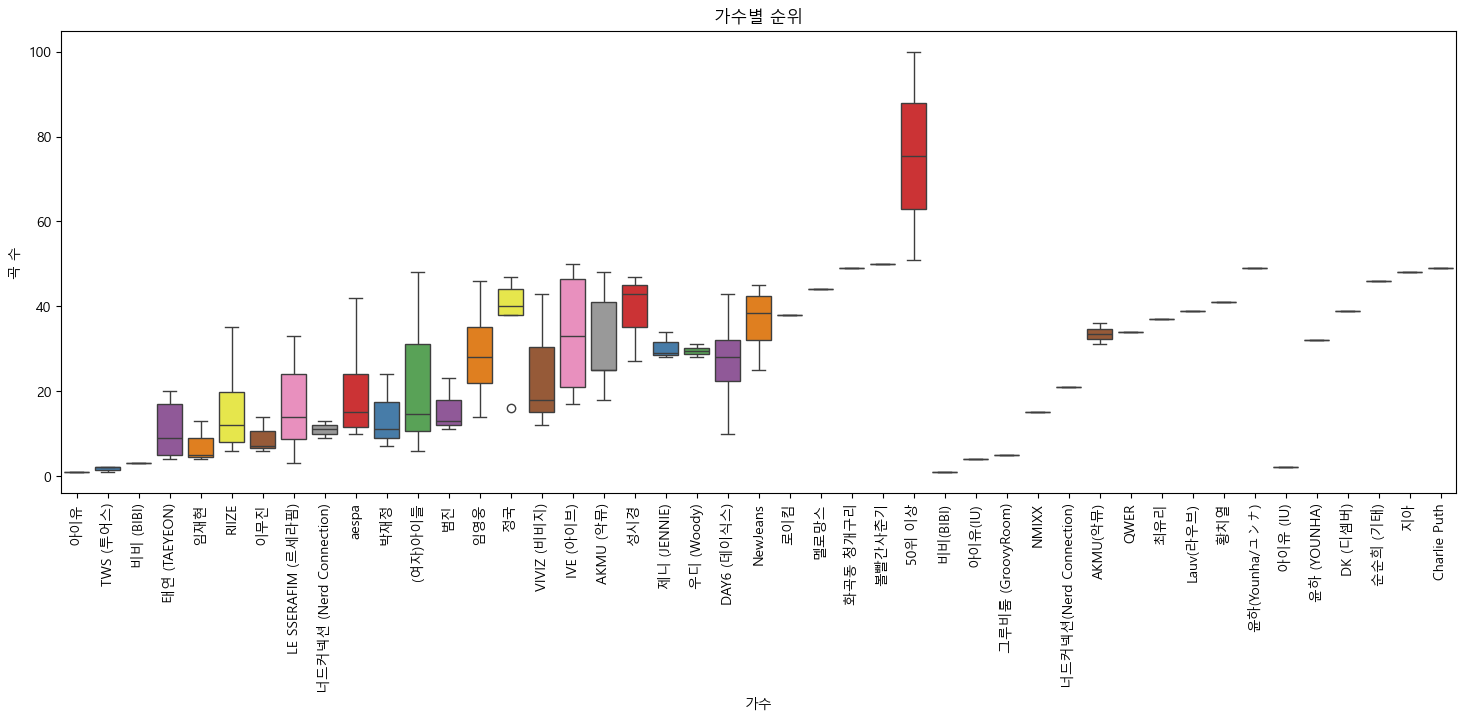

In [77]:
plt.figure(figsize=(18, 6)) # 도화지 크기
plt.rcParams['font.family'] = 'Malgun Gothic' # 폰트 변경
sns.boxplot( x='가수', y='순위', data=temp_df, palette='Set1' )
plt.title('가수별 순위')
plt.xlabel('가수')
plt.ylabel('곡 수')
plt.xticks(rotation=90) # 회전
plt.show()

In [79]:
temp_df

,서비스,순위,타이틀,가수
0,Melon,1,Love wins all,아이유
1,Melon,2,첫 만남은 계획대로 되지 않아,TWS (투어스)
2,Melon,3,밤양갱,비비 (BIBI)
3,Melon,4,To. X,태연 (TAEYEON)
4,Melon,5,비의 랩소디,임재현
...,...,...,...,...
295,Genie,96,널 미워하기로 했어,50위 이상
296,Genie,97,Yes or No (Feat. 허윤진 of LE SSERAFIM & Crush),50위 이상
297,Genie,98,Off The Record,50위 이상
298,Genie,99,Dynamite,50위 이상


In [90]:
result = temp_df.groupby('가수')['순위'].mean().sort_values()
result.head(300).reset_index()


,가수,순위
0,아이유,1.000000
1,비비(BIBI),1.000000
2,TWS (투어스),1.666667
3,아이유 (IU),2.000000
4,비비 (BIBI),3.000000
5,아이유(IU),4.000000
6,그루비룸 (GroovyRoom),5.000000
7,임재현,7.333333
8,이무진,9.000000
9,태연 (TAEYEON),11.000000


#### plot(kind=)

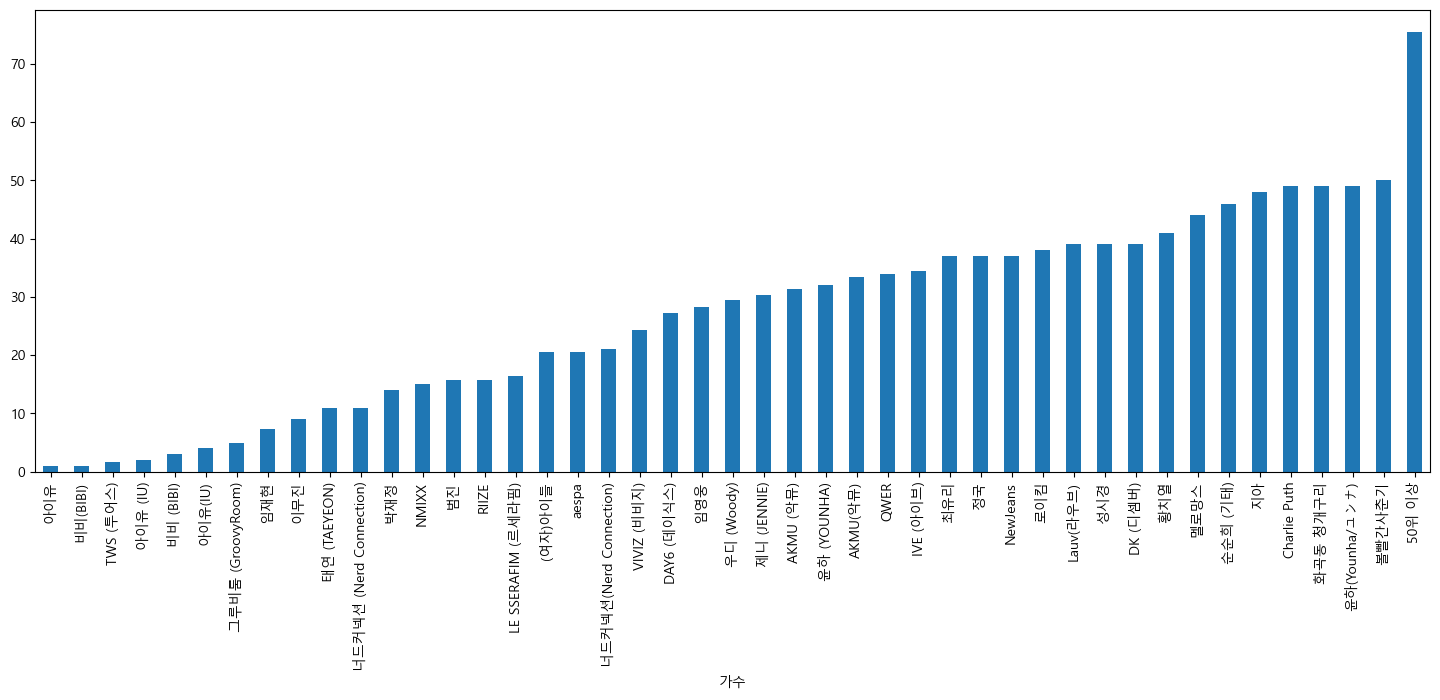

In [101]:
plt.figure(figsize=(18, 6))
result.plot(kind='bar')
plt.show()

In [105]:

a = temp_df['가수'].value_counts().reset_index()
a.columns = ['가수', '빈도수']
a

,가수,빈도수
0,50위 이상,150
1,임영웅,25
2,NewJeans,12
3,IVE (아이브),11
4,(여자)아이들,10
5,LE SSERAFIM (르세라핌),8
6,DAY6 (데이식스),6
7,RIIZE,6
8,정국,5
9,AKMU (악뮤),5


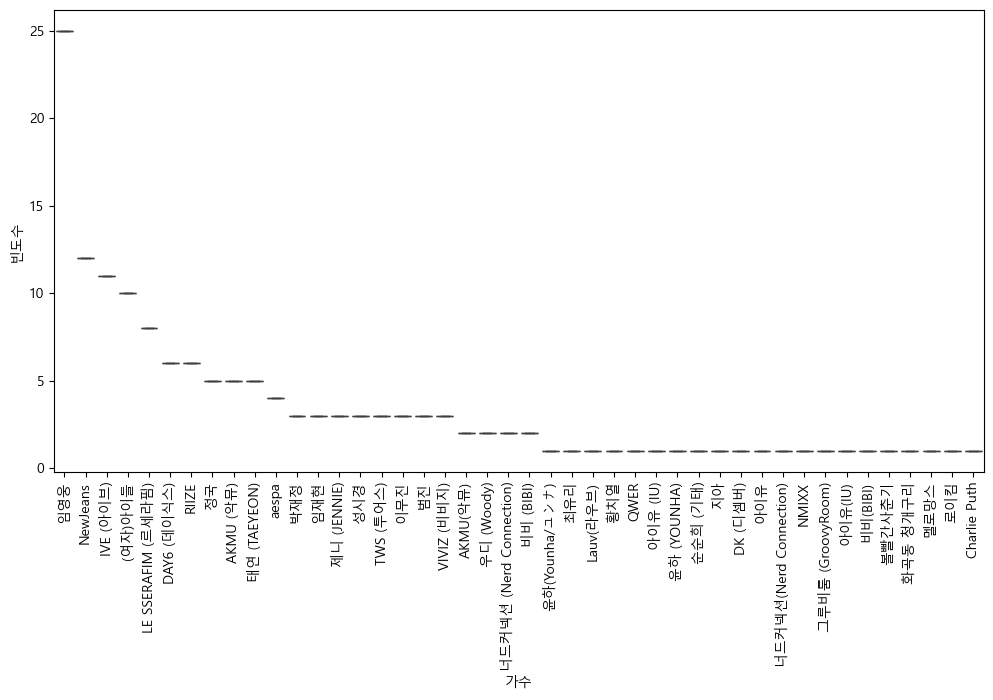

In [120]:
plt.figure(figsize=(12,6))
sns.boxplot(data=a[1:],x='가수',y='빈도수')
plt.xticks(rotation=90)
plt.show()

c:\Users\OWNER\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


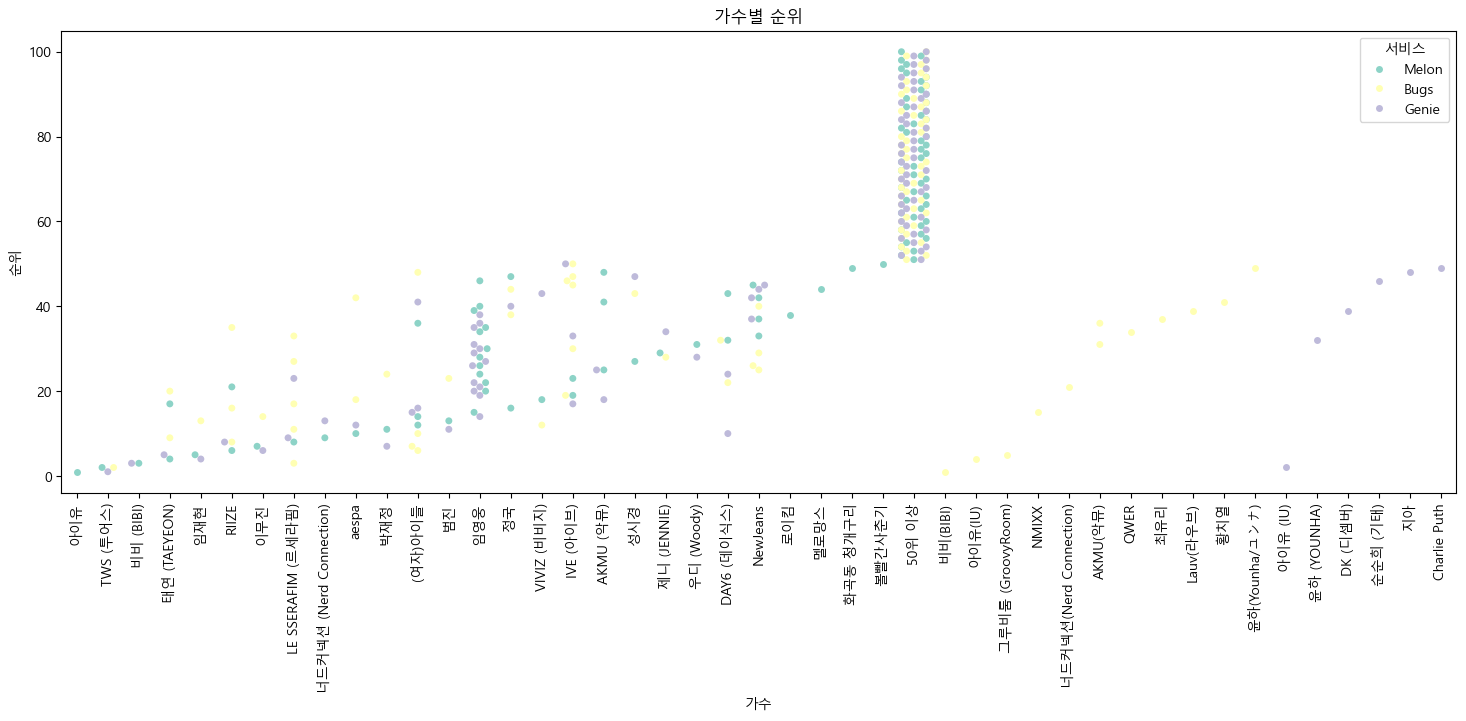

In [123]:
plt.figure(figsize=(18,6))
sns.swarmplot(x='가수',y='순위',data = temp_df, palette='Set3', hue='서비스')
plt.title('가수별 순위')
plt.xlabel('가수')
plt.ylabel('순위')
plt.xticks(rotation=90)
plt.show()


## 유튜브 차트 

In [125]:
# rank, title, category, subscriber, view, video

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import chromedriver_autoinstaller
from selenium import webdriver 
# 웹 자동화 및 데이터 수집 작업을 위한 도구로 사용. 
# 웹 페이지를 자동으로 제어하고 데이터를 추출하거나 
# 웹 애플리케이션을 자동으로 테스트하고 결과를 분석하는 등의
# 작업에 유용하게 활용
from bs4 import BeautifulSoup  
# 웹 스크래핑 및 HTML/XML 데이터 파싱에 사용되는 도구로,
# 웹 페이지의 데이터를 추출하거나 분석하는 데 유용하게 활용
from selenium.webdriver.common.keys import Keys
import time 

In [127]:
driver = webdriver.Chrome() # 드라이버 크롬으로 설정

In [128]:
url = 'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube' # 유튜브차트로 연결 
driver.get(url)

In [141]:
html = driver.page_source # 활성화 되어있는 페이지의 html소스를 변수에 저장
soup = BeautifulSoup(html, 'html.parser')

In [173]:
channels = soup.select('table > tbody > tr.aos-init')
len(channels)

100

In [185]:
channel = channels[0]
title = channel.select('td.subject > h1 >  a')[0].text.strip()
title

'장범준'

In [186]:
rank = channel.select('td.rank')[0].text.strip()
rank

'899'

In [147]:
# category

category = channel.select('td.subject > h1 > p.category')[0].text.strip()
category

'[음악/댄스/가수]'

In [150]:
# subscriber,, video

subscriber = channel.select('td.subscriber_cnt')[0].text.strip()
subscriber

'9300만'

In [153]:
# view

view = channel.select('td.view_cnt')[0].text.strip()
view

'349억4750만'

In [155]:
video = channel.select('td.video_cnt')[0].text.strip()
video

'592개'

In [204]:
channel_data = []

driver = webdriver.Chrome()
i = 1
while (i <= 10):
    url = f'https://youtube-rank.com/board/bbs/board.php?bo_table=youtube&page={i}'
    i += 1
    driver.get(url)
    time.sleep(0.5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')


    channels = soup.select('table > tbody > tr.aos-init')
    for channel in channels:
        rank = channel.select('td.rank')[0].text.strip()
        title = channel.select('td.subject > h1 >  a')[0].text.strip()
        category = channel.select('td.subject > h1 > p.category')[0].text.strip()
        subscriber = channel.select('td.subscriber_cnt')[0].text.strip().replace('만','0000')
        view = channel.select('td.view_cnt')[0].text.strip()
        video = channel.select('td.video_cnt')[0].text.strip()

        channel_data.append([rank, title, category, subscriber, view, video])

channel_data[:]

[['1', 'BLACKPINK', '[음악/댄스/가수]', '93000000', '349억4750만', '592개'],
 ['2', 'BANGTANTV', '[음악/댄스/가수]', '77500000', '222억8550만', '2,446개'],
 ['3', 'HYBE LABELS', '[음악/댄스/가수]', '74000000', '323억5336만', '1,626개'],
 ['4', 'DaFuq!?Boom!', '[미분류]', '39100000', '151억5370만', '282개'],
 ['5', '김프로KIMPRO', '[BJ/인물/연예인]', '32600000', '330억6429만', '2,662개'],
 ['6', 'SMTOWN', '[음악/댄스/가수]', '32300000', '288억0498만', '4,307개'],
 ['7', 'Mark Rober', '[미분류]', '31600000', '48억7667만', '140개'],
 ['8', 'JYP Entertainment', '[음악/댄스/가수]', '28700000', '218억0600만', '2,023개'],
 ['9',
  'Boram Tube Vlog [보람튜브 브이로그]',
  '[키즈/어린이]',
  '26500000',
  '110억5288만',
  '223개'],
 ['11', 'Alan Becker', '[해외]', '26300000', '64억6784만', '190개'],
 ['10',
  '1MILLION Dance Studio',
  '[음악/댄스/가수]',
  '26300000',
  '81억3612만',
  '6,856개'],
 ['12', '1theK (원더케이)', '[음악/댄스/가수]', '24700000', '247억9645만', '19,750개'],
 ['13', 'Mnet K-POP', '[음악/댄스/가수]', '20800000', '158억5108만', '35,563개'],
 ['14', 'KBS WORLD TV', '[TV/방송]', '19500000', 

In [202]:
df1 = pd.DataFrame(channel_data, columns=['Rank', 'Title', 'Category', 'Subscriber', 'View', 'Video'])
df1['Rank'] = df1['Rank'].astype(int)
df1_sorted = df1.sort_values(by='Rank', ascending=False)
df1.head(1000)

,Rank,Title,Category,Subscriber,View,Video
0,1,BLACKPINK,[음악/댄스/가수],9300만,349억4750만,592개
1,2,BANGTANTV,[음악/댄스/가수],7750만,222억8550만,"2,446개"
2,3,HYBE LABELS,[음악/댄스/가수],7400만,323억5336만,"1,626개"
3,4,DaFuq!?Boom!,[미분류],3910만,151억5370만,282개
4,5,김프로KIMPRO,[BJ/인물/연예인],3260만,330억6429만,"2,662개"
...,...,...,...,...,...,...
995,996,뽐뽐뽐,[음식/요리/레시피],82만,9162만,384개
996,997,k,[TV/방송],82만,0,0개
997,998,속삭이는몽자,[애완/반려동물],81만,2억5330만,600개
998,999,원지의하루,[국내/해외/여행],81만,1억6127만,362개


In [194]:
# 오름차순으로 정렬
channel_data = sorted(channel_data, key=lambda x: int(x[0]), reverse=False) 
# 만들어진 리스트에서 첫번째 원소인 rank를 정렬시켜서 저장

In [195]:
columns = ['rank', 'title', 'category', 'subscriber_cnt', 'view_cnt', 'td.video_cnt'] 
pd_ = pd.DataFrame(channel_data, columns=columns)
pd_ .head(1000)

,rank,title,category,subscriber_cnt,view_cnt,td.video_cnt
0,1,BLACKPINK,[음악/댄스/가수],9300만,349억4750만,592개
1,2,BANGTANTV,[음악/댄스/가수],7750만,222억8550만,"2,446개"
2,3,HYBE LABELS,[음악/댄스/가수],7400만,323억5336만,"1,626개"
3,4,DaFuq!?Boom!,[미분류],3910만,151억5370만,282개
4,5,김프로KIMPRO,[BJ/인물/연예인],3260만,330억6429만,"2,662개"
...,...,...,...,...,...,...
995,996,뽐뽐뽐,[음식/요리/레시피],82만,9162만,384개
996,997,k,[TV/방송],82만,0,0개
997,998,속삭이는몽자,[애완/반려동물],81만,2억5330만,600개
998,999,원지의하루,[국내/해외/여행],81만,1억6127만,362개


In [205]:
pd_.to_excel('../data/youtube-rank.xlsx', index = False) 

In [208]:
df = pd.read_excel('../data/youtube-rank.xlsx')
df.head()

,rank,title,category,subscriber_cnt,view_cnt,td.video_cnt
0,1,BLACKPINK,[음악/댄스/가수],9300만,349억4750만,592개
1,2,BANGTANTV,[음악/댄스/가수],7750만,222억8550만,"2,446개"
2,3,HYBE LABELS,[음악/댄스/가수],7400만,323억5336만,"1,626개"
3,4,DaFuq!?Boom!,[미분류],3910만,151억5370만,282개
4,5,김프로KIMPRO,[BJ/인물/연예인],3260만,330억6429만,"2,662개"


In [210]:
df['new_subscriber'] = df['subscriber_cnt'].str.replace('만','0000').astype(int)

In [212]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   rank            1000 non-null   int64 
 1   title           1000 non-null   object
 2   category        1000 non-null   object
 3   subscriber_cnt  1000 non-null   object
 4   view_cnt        1000 non-null   object
 5   td.video_cnt    1000 non-null   object
 6   new_subscriber  1000 non-null   int32 
dtypes: int32(1), int64(1), object(5)
memory usage: 50.9+ KB


,rank,title,category,subscriber_cnt,view_cnt,td.video_cnt,new_subscriber
0,1,BLACKPINK,[음악/댄스/가수],9300만,349억4750만,592개,93000000
1,2,BANGTANTV,[음악/댄스/가수],7750만,222억8550만,"2,446개",77500000
2,3,HYBE LABELS,[음악/댄스/가수],7400만,323억5336만,"1,626개",74000000
3,4,DaFuq!?Boom!,[미분류],3910만,151억5370만,282개,39100000
4,5,김프로KIMPRO,[BJ/인물/연예인],3260만,330억6429만,"2,662개",32600000


In [216]:
tmp = df.pivot_table(index='category', values='new_subscriber', aggfunc=['sum', 'count'])
tmp.columns = ['구독자 수 총합', '채널 수']
tmp.sort_values(by='구독자 수 총합', ascending=False)

,구독자 수 총합,채널 수
category,,
[음악/댄스/가수],852890000,147
[미분류],443980000,207
[키즈/어린이],420440000,128
[TV/방송],275700000,113
[음식/요리/레시피],223870000,69
[BJ/인물/연예인],159930000,59
[뉴스/정치/사회],113460000,58
[해외],77900000,15
[게임],74010000,49
